In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer 



In [2]:
X=pd.read_csv("C:/Users/lenovo/OneDrive/Desktop/DAN-P9-data/fichier_final.csv",encoding = 'utf8')
X.head()

,Zone,Disponibilite_autres_viandes,Disponibilite_cereales,Disponibilite_volaille,Exportations_autres_viandes,Exportations_cereales,Exportations_volaille,Importations_autres_viandes,Importations_cereales,Importations_volaille,...,Pertes_cereales,Pertes_volaille,Production_autres_viandes,Production_cereales,Production_volaille,Population,PIB,Valeur_ajoutee_agriculture,Sous_alimentation,Stabilite_politique
0,Afghanistan,260.0,10.0,57.0,0.0,0.0,0.0,6.0,0.0,29.0,...,0.0,2.0,254.0,9.0,28.0,36296.113,1.889635e+04,4992.453824,22.7,-2.80
1,Afrique du Sud,1404.0,75.0,2118.0,76.0,16.0,63.0,56.0,15.0,514.0,...,1.0,83.0,1420.0,74.0,1667.0,57009.756,3.808514e+05,9497.680787,5.7,-0.28
2,Albanie,89.0,0.0,47.0,0.0,0.0,0.0,12.0,1.0,38.0,...,0.0,0.0,77.0,0.0,13.0,2884.169,1.301973e+04,2476.629502,4.2,0.38
3,Algérie,490.0,8.0,277.0,0.0,0.0,0.0,50.0,8.0,2.0,...,0.0,13.0,440.0,0.0,275.0,41389.189,1.700970e+05,19996.432170,2.6,-0.92
4,Allemagne,5475.0,2228.0,1739.0,2956.0,250.0,646.0,1725.0,416.0,842.0,...,73.0,0.0,6675.0,2360.0,1514.0,82658.409,3.690849e+06,31436.767780,0.0,0.59


In [3]:
X.set_index('Zone', inplace=True)

In [4]:
sc = StandardScaler()
Z = pd.DataFrame(sc.fit_transform(X), columns=X.columns,index=X.index)
Z

,Disponibilite_autres_viandes,Disponibilite_cereales,Disponibilite_volaille,Exportations_autres_viandes,Exportations_cereales,Exportations_volaille,Importations_autres_viandes,Importations_cereales,Importations_volaille,Nourriture_autres_viandes,...,Pertes_cereales,Pertes_volaille,Production_autres_viandes,Production_cereales,Production_volaille,Population,PIB,Valeur_ajoutee_agriculture,Sous_alimentation,Stabilite_politique
Zone,,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.247363,-0.259565,-0.305390,-0.320493,-0.334395,-0.211267,-0.390161,-0.354417,-0.303025,-0.245818,...,-0.283615,-0.187824,-0.240439,-0.258203,-0.277933,0.006401,-0.235154,-0.230323,1.272932,-3.042060
Afrique du Sud,0.295132,-0.206160,0.881014,-0.181365,-0.108632,-0.071809,-0.253741,-0.061326,2.366765,0.278034,...,-0.268574,1.110627,0.265776,-0.207277,0.500105,0.190928,-0.012689,-0.116732,-0.272306,-0.218804
Albanie,-0.328452,-0.267781,-0.311146,-0.320493,-0.334395,-0.211267,-0.373791,-0.334878,-0.253482,-0.320450,...,-0.283615,-0.219885,-0.317283,-0.265254,-0.285053,-0.291250,-0.238766,-0.293755,-0.408650,0.520621
Algérie,-0.138295,-0.261208,-0.178748,-0.320493,-0.334395,-0.211267,-0.270112,-0.198102,-0.451652,-0.139811,...,-0.283615,-0.011492,-0.159687,-0.265254,-0.160681,0.051772,-0.142223,0.147976,-0.554084,-0.935821
Allemagne,2.225634,1.562770,0.662845,5.090853,3.193156,1.218730,4.299957,7.773994,4.172314,2.237484,...,0.814420,-0.219885,2.547215,1.583753,0.427476,0.419419,2.021702,0.436424,-0.790415,0.755892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.262537,-0.248062,-0.101036,-0.287541,-0.221513,-0.003187,0.076395,0.251306,1.920883,-0.291453,...,-0.283615,-0.219885,-0.317283,-0.265254,-0.268439,-0.232427,-0.009767,-0.281285,-0.399561,0.789502
Équateur,-0.154418,-0.266138,-0.141907,-0.320493,-0.306174,-0.211267,-0.403803,-0.334878,-0.462662,-0.156449,...,-0.283615,0.052629,-0.158385,-0.264471,-0.129826,-0.167411,-0.182666,-0.110873,0.191266,0.016468
États-Unis d'Amérique,10.021147,0.249013,10.176527,6.791510,4.011548,7.961413,5.604132,6.425772,0.214419,10.085743,...,0.062341,-0.219885,9.892973,0.244006,10.111419,2.579077,11.724395,4.066205,-0.790415,0.419790


In [5]:
kmo_all,kmo_model=calculate_kmo(Z)
kmo_model

C:\Users\lenovo\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7020877133305805

### KMO selon la charte quie est moyen

In [6]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

,communalities,0,1,2,components,eigen_values,variance_%,cumulative_variance_%
Disponibilite_autres_viandes,0.972667,0.933379,0.109597,0.299097,1,10.307390,0.360762,0.360762
Disponibilite_cereales,0.842006,-0.000387,0.892320,0.213941,2,5.364660,0.260169,0.620931
Disponibilite_volaille,0.978812,0.972844,0.140406,0.112568,3,1.838921,0.105728,0.726659
Exportations_autres_viandes,0.697567,0.661591,0.197390,0.470002,4,1.338770,NaN,NaN
Exportations_cereales,0.430959,0.322379,0.244207,0.517101,5,1.157145,NaN,NaN
Exportations_volaille,0.714606,0.830191,-0.006154,0.159217,6,0.734731,NaN,NaN
Importations_autres_viandes,0.717734,0.466497,0.042731,0.705895,7,0.558536,NaN,NaN
Importations_cereales,0.664158,0.496761,0.050519,0.644076,8,0.456665,NaN,NaN
Importations_volaille,0.242878,0.146867,0.009737,0.470333,9,0.397039,NaN,NaN
Nourriture_autres_viandes,0.972068,0.934439,0.086428,0.302360,10,0.202747,NaN,NaN


### communalities : on supprime les variables qui sont expliquee a moins de 30% 

In [8]:
Z.drop(columns=['Sous_alimentation','Stabilite_politique','Importations_volaille'],inplace=True)
Z.head()

,Disponibilite_autres_viandes,Disponibilite_cereales,Disponibilite_volaille,Exportations_autres_viandes,Exportations_cereales,Exportations_volaille,Importations_autres_viandes,Importations_cereales,Nourriture_autres_viandes,Nourriture_cereales,Nourriture_volaille,Pertes_autres_viandes,Pertes_cereales,Pertes_volaille,Production_autres_viandes,Production_cereales,Production_volaille,Population,PIB,Valeur_ajoutee_agriculture
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,-0.247363,-0.259565,-0.305390,-0.320493,-0.334395,-0.211267,-0.390161,-0.354417,-0.245818,-0.168478,-0.295561,-0.054960,-0.283615,-0.187824,-0.240439,-0.258203,-0.277933,0.006401,-0.235154,-0.230323
Afrique du Sud,0.295132,-0.206160,0.881014,-0.181365,-0.108632,-0.071809,-0.253741,-0.061326,0.278034,-0.114522,0.862665,0.829445,-0.268574,1.110627,0.265776,-0.207277,0.500105,0.190928,-0.012689,-0.116732
Albanie,-0.328452,-0.267781,-0.311146,-0.320493,-0.334395,-0.211267,-0.373791,-0.334878,-0.320450,-0.178810,-0.300241,-0.272182,-0.283615,-0.219885,-0.317283,-0.265254,-0.285053,-0.291250,-0.238766,-0.293755
Algérie,-0.138295,-0.261208,-0.178748,-0.320493,-0.334395,-0.211267,-0.270112,-0.198102,-0.139811,-0.175366,-0.173304,0.069167,-0.283615,-0.011492,-0.159687,-0.265254,-0.160681,0.051772,-0.142223,0.147976
Allemagne,2.225634,1.562770,0.662845,5.090853,3.193156,1.218730,4.299957,7.773994,2.237484,-0.155850,0.613471,-0.194603,0.814420,-0.219885,2.547215,1.583753,0.427476,0.419419,2.021702,0.436424


In [30]:
n_comp=3
fa = FactorAnalyzer(rotation = 'varimax',impute = "drop",n_factors=n_comp)
coord=fa.fit_transform(Z)

results=pd.DataFrame(fa.get_communalities(),columns=['communalities'])
results=results.join(pd.DataFrame(fa.loadings_))
results['components']=results.index+1
results['eigen_values']=fa.get_eigenvalues()[0]
results['variance_%']=list(fa.get_factor_variance()[1])+[None]*(results.shape[0]-n_comp)
results['cumulative_variance_%']=list(fa.get_factor_variance()[2])+[None]*(results.shape[0]-n_comp)

results.index=Z.columns
results

,communalities,0,1,2,components,eigen_values,variance_%,cumulative_variance_%
Disponibilite_autres_viandes,0.976170,0.978213,0.136909,0.022942,1,10.188918,0.453130,0.453130
Disponibilite_cereales,0.974799,0.069908,0.550539,0.816590,2,5.273567,0.242178,0.695308
Disponibilite_volaille,0.956228,0.941370,0.249827,-0.087385,3,1.478849,0.126230,0.821538
Exportations_autres_viandes,0.695964,0.787819,0.080925,0.262216,4,0.998392,NaN,NaN
Exportations_cereales,0.442289,0.491895,0.005010,0.447553,5,0.643096,NaN,NaN
Exportations_volaille,0.703033,0.838303,0.009544,0.013794,6,0.449341,NaN,NaN
Importations_autres_viandes,0.463707,0.656811,-0.052074,0.172031,7,0.220878,NaN,NaN
Importations_cereales,0.535123,0.685659,-0.089219,0.238820,8,0.202592,NaN,NaN
Nourriture_autres_viandes,0.976358,0.981658,0.110741,0.021000,9,0.162579,NaN,NaN
Nourriture_cereales,0.884741,-0.060929,0.821166,0.454660,10,0.124015,NaN,NaN


### les communalities sont toutes superieure 0,30 et sont expliques toute a plus de 30% par l'ACP

les valeurs propre, on applicant cette regle on garde que 3 facteurs soit les 3 premmiers facteurs superieur a 1

les 3 facteurs expliquent 82% de la variance de toutes les variables(45-24-12%)

#le facteur 0 developpement general
#facteur 1 developpement agricole
#facteur2 autosuffisance cereales

In [10]:
p=Z.shape[1]
n=Z.shape[0]

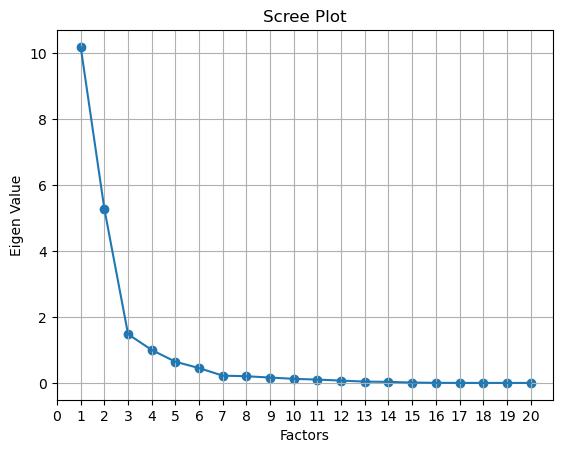

In [11]:
plt.scatter(range(1,p+1),results.eigen_values)
plt.plot(range(1,p+1),results.eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.xticks(np.arange(0, p+1, step=1))
plt.grid()

In [33]:
df_pca=pd.DataFrame(coord)
columns=['developpement_general','developpement_agricol','autosuffisance_cereales']
df_pca.columns=columns
df_pca.index=Z.index
df_pca.head()

,developpement_general,developpement_agricol,autosuffisance_cereales
Zone,,,
Afghanistan,-0.286862,0.129745,-0.346696
Afrique du Sud,0.305010,0.350609,-1.094562
Albanie,-0.288225,-0.313761,-0.030440
Algérie,-0.153859,0.019802,-0.243626
Allemagne,2.631219,-1.781391,5.348446


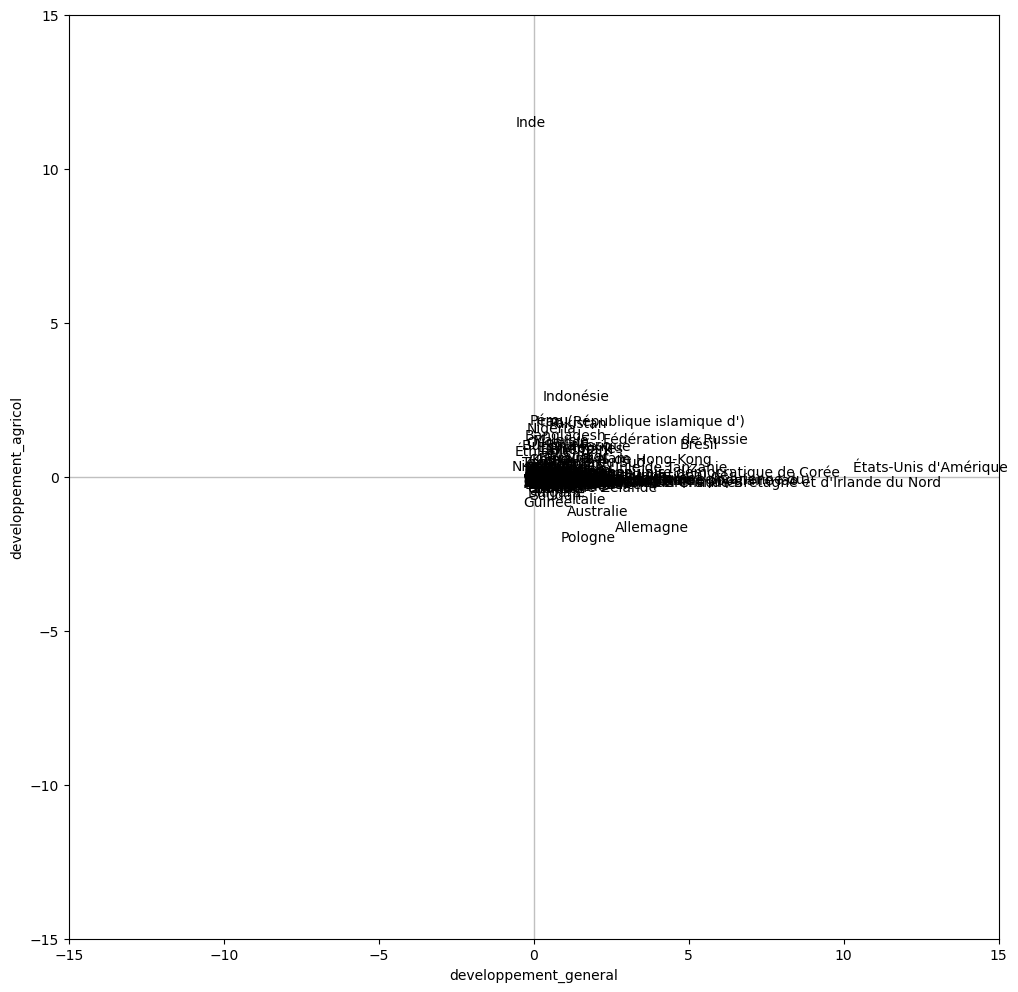

In [34]:
plan=(0,1)
s=15
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [15]:
## l'Inde Chine et USA -> pays aberrant il faudra le traiter a part 

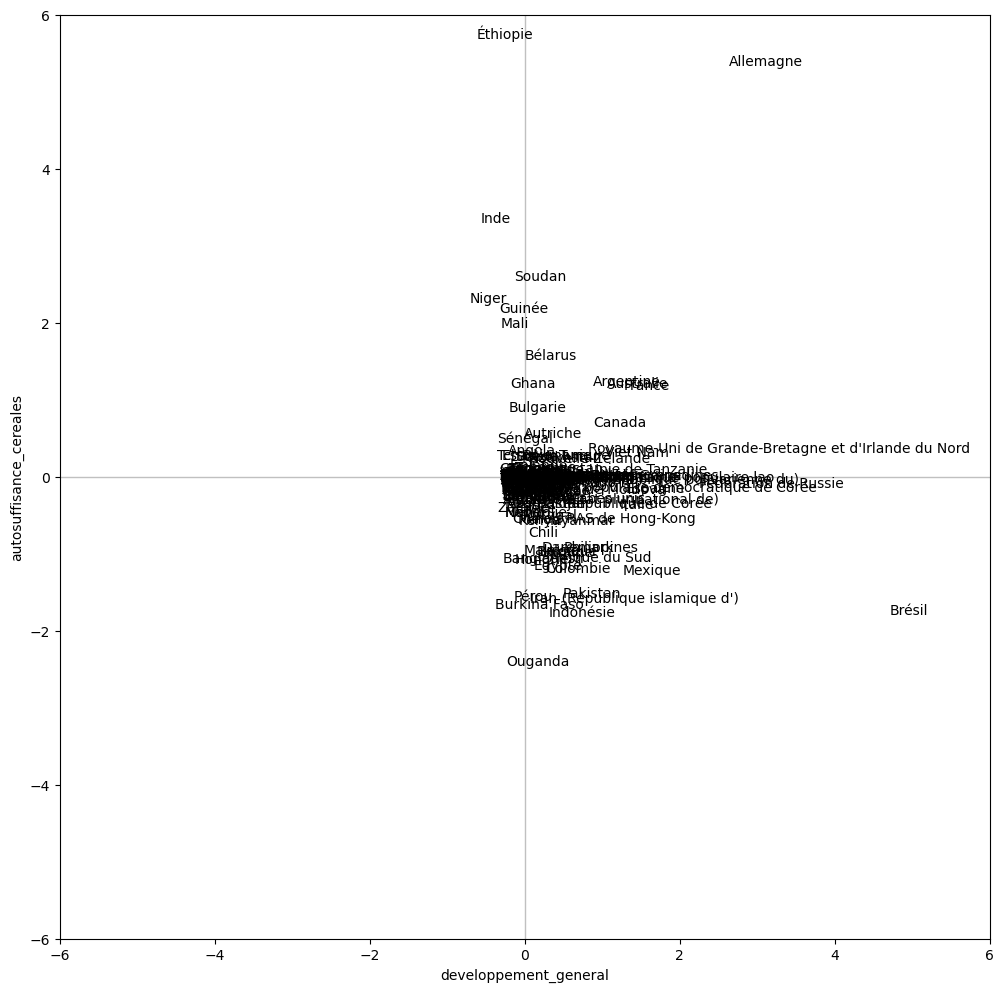

In [35]:
plan=(0,2)
fig, axes = plt.subplots(figsize=(12,12))
s=6
axes.set_xlim(-s,s) #même limites en abscisse
axes.set_ylim(-s,s) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-s,s],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-s,s],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [ ]:
# bresil comme pays aberrant

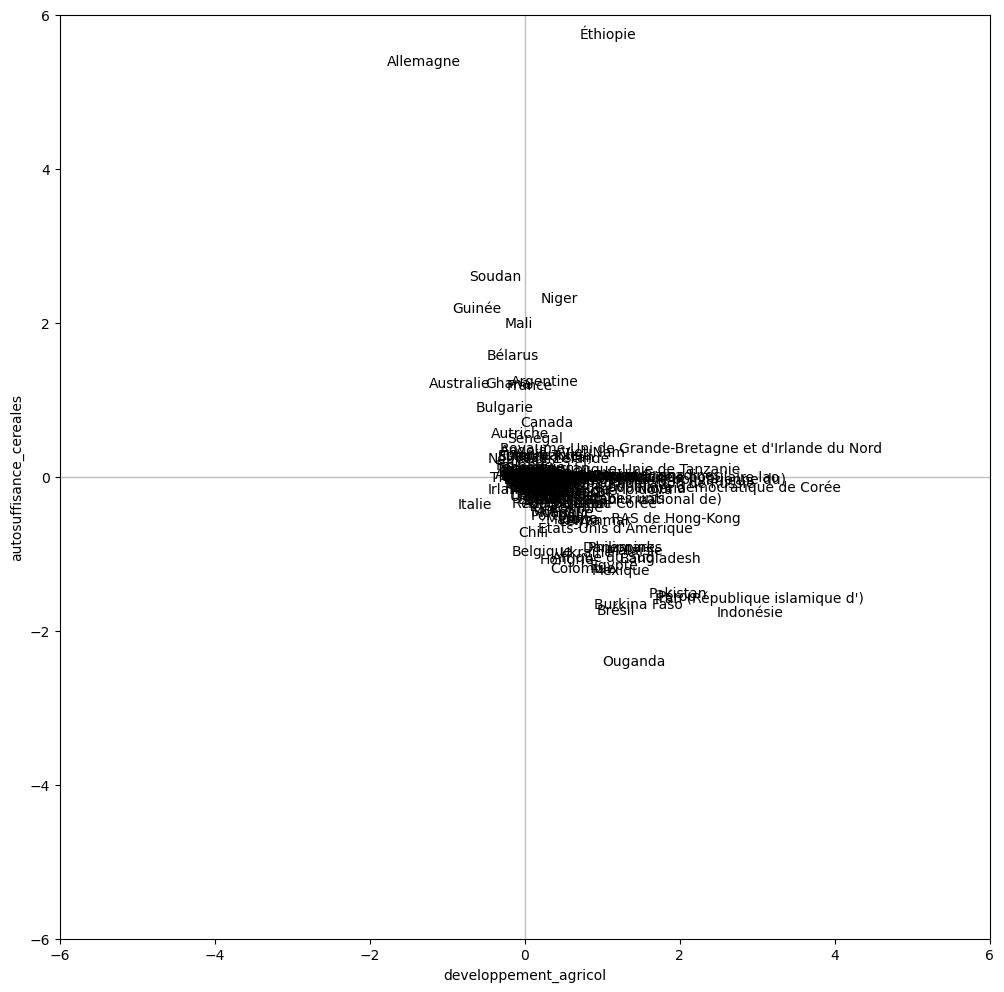

In [36]:
plan=(1,2)
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df_pca.index[i],(df_pca[df_pca.columns[plan[0]]][i],df_pca[df_pca.columns[plan[1]]][i]))
plt.xlabel(df_pca.columns[plan[0]])
plt.ylabel(df_pca.columns[plan[1]])
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

# clusterings

https://towardsdatascience.com/clustering-algorithms-for-customer-segmentation-af637c6830ac

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


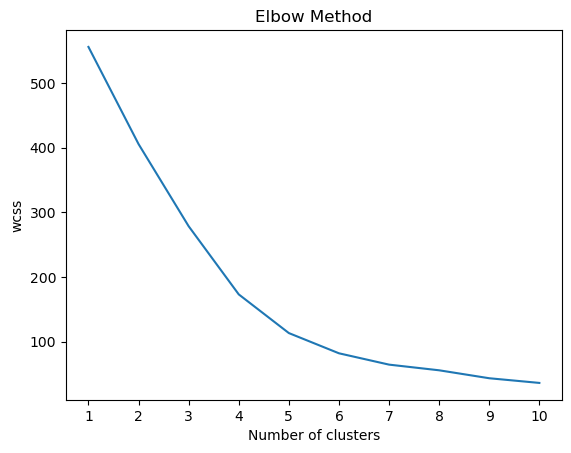

In [39]:
X=df_pca
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.xticks(range(1,11))
plt.show()

In [40]:
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
X['clusters']=y_means
X.head(10)

,developpement_general,developpement_agricol,autosuffisance_cereales,clusters
Zone,,,,
Afghanistan,-0.286862,0.129745,-0.346696,0
Afrique du Sud,0.305010,0.350609,-1.094562,0
Albanie,-0.288225,-0.313761,-0.030440,0
Algérie,-0.153859,0.019802,-0.243626,0
Allemagne,2.631219,-1.781391,5.348446,1
Angola,-0.215311,-0.323830,0.296607,0
Antigua-et-Barbuda,-0.324450,-0.290987,-0.029671,0
Arabie saoudite,-0.069587,-0.386315,-0.021540,0
Argentine,0.874919,-0.174866,1.191274,0


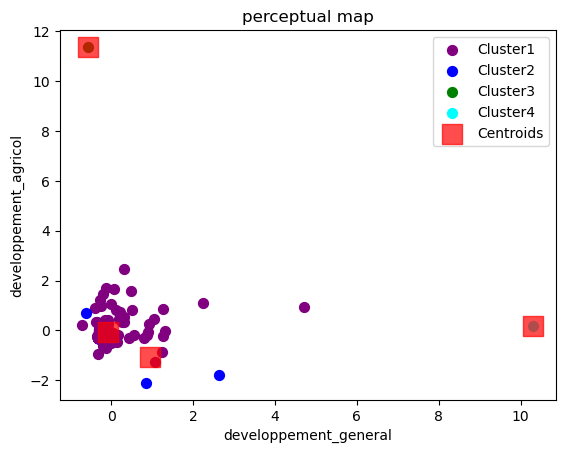

In [41]:
plan=(0,1)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

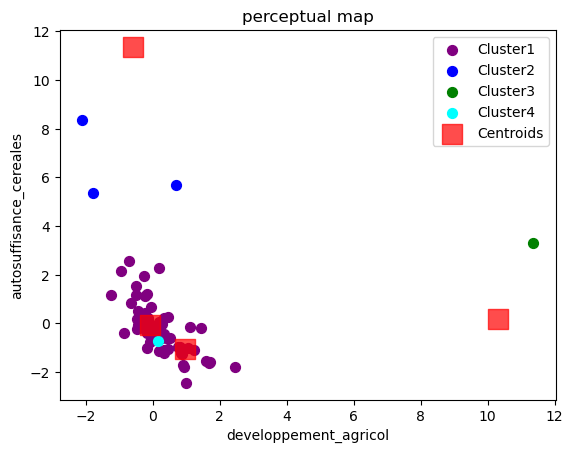

In [44]:
plan=(1,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

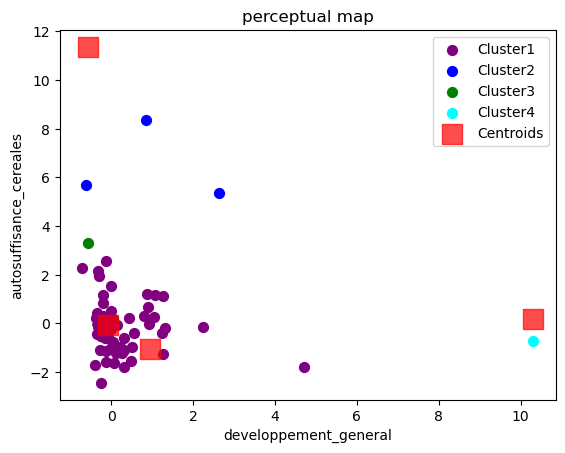

In [45]:
plan=(0,2)
plt.scatter(X[y_means==0][X.columns[plan[0]]],X[y_means==0][X.columns[plan[1]]],s=50, c='purple',label='Cluster1')
plt.scatter(X[y_means==1][X.columns[plan[0]]],X[y_means==1][X.columns[plan[1]]],s=50, c='blue',label='Cluster2')
plt.scatter(X[y_means==2][X.columns[plan[0]]],X[y_means==2][X.columns[plan[1]]],s=50, c='green',label='Cluster3')
plt.scatter(X[y_means==3][X.columns[plan[0]]],X[y_means==3][X.columns[plan[1]]],s=50, c='cyan',label='Cluster4')
plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [46]:
clust=X.groupby('clusters').agg(np.mean)
clust

,developpement_general,developpement_agricol,autosuffisance_cereales
clusters,,,
0,-0.078241,-0.051907,-0.136412
1,0.953371,-1.057452,6.461935
2,-0.575293,11.365775,3.298830
3,10.311912,0.163682,-0.722362


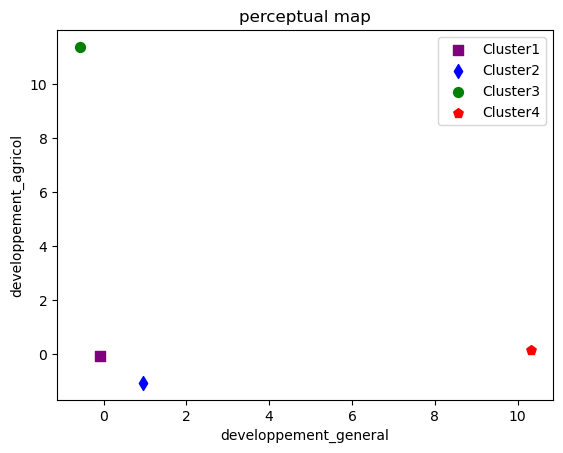

In [47]:
plan=(0,1)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster3')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster4')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

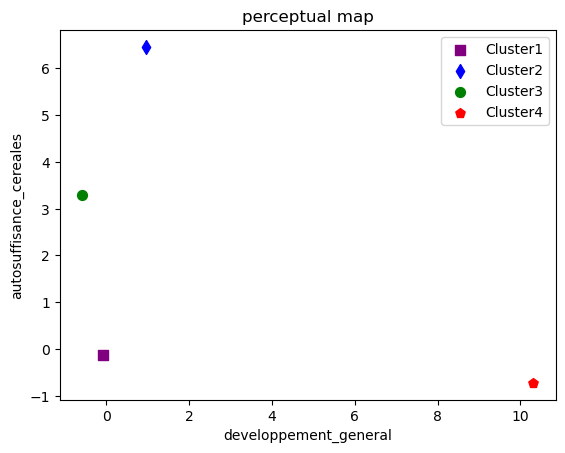

In [24]:
plan=(0,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster3')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster4')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

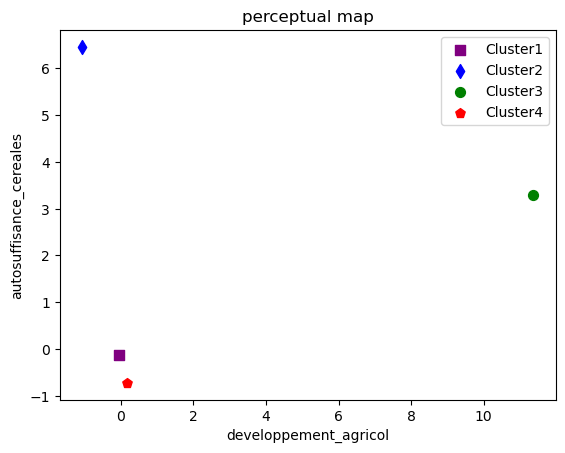

In [25]:
plan=(1,2)
plt.scatter(clust[X.columns[plan[0]]][0],clust[X.columns[plan[1]]][0],s=50, marker='s', c='purple',label='Cluster1')
plt.scatter(clust[X.columns[plan[0]]][1],clust[X.columns[plan[1]]][1],s=50, marker='d', c='blue',label='Cluster2')
plt.scatter(clust[X.columns[plan[0]]][2],clust[X.columns[plan[1]]][2],s=50,marker='o', c='green',label='Cluster3')
plt.scatter(clust[X.columns[plan[0]]][3],clust[X.columns[plan[1]]][3],s=50,marker='p', c='red',label='Cluster4')
plt.title('perceptual map')
plt.xlabel(X.columns[plan[0]])
plt.ylabel(X.columns[plan[1]])
plt.legend()
plt.show()

In [ ]:
pour le cluster 3 , fort developpement agricole , autosuffisance creales moyenne et developpement generale faible
>>>
>>>
>>>

In [48]:
X[X.clusters==0]

,developpement_general,developpement_agricol,autosuffisance_cereales,clusters
Zone,,,,
Afghanistan,-0.286862,0.129745,-0.346696,0
Afrique du Sud,0.305010,0.350609,-1.094562,0
Albanie,-0.288225,-0.313761,-0.030440,0
Algérie,-0.153859,0.019802,-0.243626,0
Angola,-0.215311,-0.323830,0.296607,0
...,...,...,...,...
Zimbabwe,-0.291476,-0.044628,-0.295797,0
Égypte,0.117271,0.838338,-1.201674,0
Émirats arabes unis,-0.229342,0.026529,-0.327771,0


In [49]:
X[X.clusters==1]

,developpement_general,developpement_agricol,autosuffisance_cereales,clusters
Zone,,,,
Allemagne,2.631219,-1.781391,5.348446,1
Pologne,0.852502,-2.096605,8.343991,1
Éthiopie,-0.623607,0.705640,5.693367,1


In [50]:
X[X.clusters==2]

,developpement_general,developpement_agricol,autosuffisance_cereales,clusters
Zone,,,,
Inde,-0.575293,11.365775,3.29883,2


In [51]:
X[X.clusters==3]

,developpement_general,developpement_agricol,autosuffisance_cereales,clusters
Zone,,,,
États-Unis d'Amérique,10.311912,0.163682,-0.722362,3
